In [5]:
import scipy.io as sio
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [6]:
#loading data
DDataFile = './D_VLOS_scaled_mean_mean_alpha6_fft_abs_Frobenius_sphericalWave_B32_U20000.mat'
DData = sio.loadmat(DDataFile)

LocationDataFile = './randLocationU20000VIP.mat'
locationData = sio.loadmat(LocationDataFile)


In [7]:
#preprocessing the data
D_data = DData['D']
location_data = locationData['location']
location_data = location_data[:2,:]

l, total = D_data.shape
d, total = location_data.shape

train_length = int(np.floor(total * 0.8))

impulses_train = np.transpose(D_data[:, :train_length])
location_train = np.transpose(location_data[:,:train_length])

impulses_test = np.transpose(D_data[:, train_length:])
location_test = np.transpose(location_data[:,train_length:])

In [8]:
#Build the model
model = keras.Sequential()

keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
#model.add(Dropout(0.2)) # best 0.2
keras.layers.Conv2D(1024, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

# keras.layers.normalization.BatchNormalization()#epsilon=1e-06, mode=0, momentum=0.9, weights=None)
# model.add(Dropout(0.2)) # best 0.2
# keras.layers.Conv2D(2048, 3)  #, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
# keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)

keras.layers.normalization.BatchNormalization()
model.add(Dropout(0.25)) # best 0.2
model.add(Dense(1024, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

# keras.layers.normalization.BatchNormalization()
# model.add(Dropout(0.25)) # best 0.2
# model.add(Dense(1024, activation = 'relu'))  #tanh(343,1794)   relu (680,1600)   #the hidden layer number 

model.add(Dense(d, activation = 'linear'))  # None is different from 'linear'      ### the output layer

In [9]:
#Compilation
loss_func = 'mean_squared_error'   #   categorical_crossentropy(bad)   mean_squared_error
opt_func = keras.optimizers.Adam(lr=0.05) #'Adam'  lr=0.2  #  RMSprop(overfiiting) sgd(overfitting)  Adadelta(overfitting)   Adam

model.compile(loss = loss_func, 
              optimizer = opt_func,
             metrics = ['mae'])

#best set: categorical_crossentropy  and sgd, but the loss and acc do not change....

In [10]:
#Train the model, iterating
early_stop = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1)
history = model.fit(impulses_train, location_train,
                    batch_size = 20, # 10,20
                    epochs = 200,
                    verbose = 2,
                   # callbacks=[early_stop], 
                    validation_split = 0.2 #0.2
                    #validation_data=(impulses_test, location_test)
                   )


Train on 12800 samples, validate on 3200 samples
Epoch 1/200
 - 22s - loss: 6637.5551 - mean_absolute_error: 59.0377 - val_loss: 2970.4004 - val_mean_absolute_error: 42.4132
Epoch 2/200
 - 19s - loss: 3611.4696 - mean_absolute_error: 45.7774 - val_loss: 3047.1484 - val_mean_absolute_error: 42.3303
Epoch 3/200
 - 19s - loss: 3025.8778 - mean_absolute_error: 41.5081 - val_loss: 2123.1168 - val_mean_absolute_error: 34.8582
Epoch 4/200
 - 19s - loss: 2601.2268 - mean_absolute_error: 38.4926 - val_loss: 2061.5824 - val_mean_absolute_error: 35.2050
Epoch 5/200
 - 19s - loss: 2403.3598 - mean_absolute_error: 36.9851 - val_loss: 1861.3698 - val_mean_absolute_error: 32.8941
Epoch 6/200
 - 19s - loss: 2315.2459 - mean_absolute_error: 36.3881 - val_loss: 2065.6473 - val_mean_absolute_error: 34.6253
Epoch 7/200
 - 19s - loss: 2177.0497 - mean_absolute_error: 35.3253 - val_loss: 1906.0553 - val_mean_absolute_error: 33.0357
Epoch 8/200
 - 19s - loss: 2147.4085 - mean_absolute_error: 35.0274 - val_lo

Epoch 66/200
 - 17s - loss: 1443.4048 - mean_absolute_error: 28.8467 - val_loss: 1810.6735 - val_mean_absolute_error: 32.6532
Epoch 67/200
 - 17s - loss: 1436.9627 - mean_absolute_error: 28.8701 - val_loss: 1736.7398 - val_mean_absolute_error: 31.4053
Epoch 68/200
 - 19s - loss: 1416.3048 - mean_absolute_error: 28.4401 - val_loss: 1821.2973 - val_mean_absolute_error: 32.3052
Epoch 69/200
 - 18s - loss: 1448.3027 - mean_absolute_error: 28.9641 - val_loss: 1775.4907 - val_mean_absolute_error: 32.0250
Epoch 70/200
 - 19s - loss: 1404.8640 - mean_absolute_error: 28.5401 - val_loss: 1705.3185 - val_mean_absolute_error: 31.4267
Epoch 71/200
 - 17s - loss: 1422.5988 - mean_absolute_error: 28.5799 - val_loss: 1782.9693 - val_mean_absolute_error: 32.1549
Epoch 72/200
 - 17s - loss: 1431.5774 - mean_absolute_error: 28.6665 - val_loss: 1888.9227 - val_mean_absolute_error: 33.0068
Epoch 73/200
 - 17s - loss: 1409.2342 - mean_absolute_error: 28.4872 - val_loss: 1754.4992 - val_mean_absolute_error: 

Epoch 131/200
 - 17s - loss: 1276.4571 - mean_absolute_error: 27.1651 - val_loss: 1709.2371 - val_mean_absolute_error: 31.4501
Epoch 132/200
 - 17s - loss: 1285.0056 - mean_absolute_error: 27.2691 - val_loss: 1774.7265 - val_mean_absolute_error: 32.2535
Epoch 133/200
 - 17s - loss: 1277.9222 - mean_absolute_error: 27.2572 - val_loss: 1865.6243 - val_mean_absolute_error: 32.7908
Epoch 134/200
 - 17s - loss: 1303.9661 - mean_absolute_error: 27.4413 - val_loss: 1849.0710 - val_mean_absolute_error: 32.6116
Epoch 135/200
 - 17s - loss: 1255.0416 - mean_absolute_error: 26.9937 - val_loss: 1969.1500 - val_mean_absolute_error: 33.8267
Epoch 136/200
 - 17s - loss: 1265.5478 - mean_absolute_error: 27.0125 - val_loss: 1899.0312 - val_mean_absolute_error: 33.0522
Epoch 137/200
 - 17s - loss: 1273.2866 - mean_absolute_error: 27.0013 - val_loss: 1790.6101 - val_mean_absolute_error: 32.1578
Epoch 138/200
 - 17s - loss: 1272.8768 - mean_absolute_error: 27.1085 - val_loss: 2189.2819 - val_mean_absolute

Epoch 196/200
 - 19s - loss: 1210.5864 - mean_absolute_error: 26.4373 - val_loss: 2018.0321 - val_mean_absolute_error: 34.3303
Epoch 197/200
 - 19s - loss: 1208.9339 - mean_absolute_error: 26.4202 - val_loss: 1899.4891 - val_mean_absolute_error: 32.9835
Epoch 198/200
 - 19s - loss: 1219.2864 - mean_absolute_error: 26.5995 - val_loss: 2016.3522 - val_mean_absolute_error: 34.1835
Epoch 199/200
 - 19s - loss: 1217.0630 - mean_absolute_error: 26.5429 - val_loss: 1798.2876 - val_mean_absolute_error: 32.2726
Epoch 200/200
 - 19s - loss: 1205.3785 - mean_absolute_error: 26.3862 - val_loss: 1827.4808 - val_mean_absolute_error: 32.4664


In [11]:
#make prediction
loc_prediction = model.predict(impulses_test)
print(loc_prediction.shape)
print(location_test.shape)

(4000, 2)
(4000, 2)


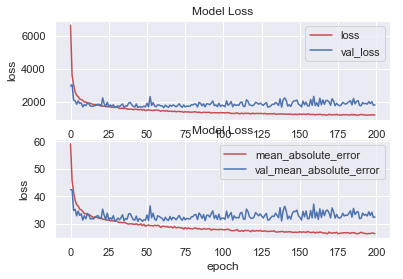

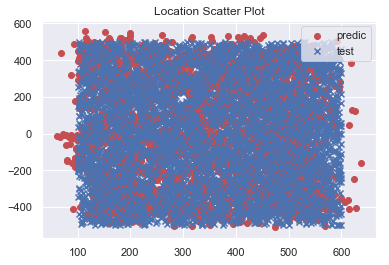

In [12]:
#plot the loss data
plt.subplot(211)
plt.plot(history.history['loss'],'r',label = 'loss')
plt.plot(history.history['val_loss'],'b', label = 'val_loss')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(212)
plt.plot(history.history['mean_absolute_error'],'r',label = 'mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'],'b', label = 'val_mean_absolute_error')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Location Scatter Plot')
ax1.scatter(loc_prediction[:,0],loc_prediction[:,1],c = 'r',marker = 'o', label = 'predic')
ax1.scatter(location_test[:,0],location_test[:,1],c = 'b',marker = 'x', label = 'test')
plt.legend()
plt.show()

In [13]:
#The training result
loss = model.evaluate(impulses_test, location_test, verbose=1)
print ('Test loss & mean_absolute_error: ', loss)

4000/4000 [==============================] - 0s 116us/step
Test loss & mean_absolute_error:  [1823.8917045898438, 31.97357369995117]


error distance is  49.07386442841613
max error distance is  272.3316243268914
min error distance is  0.5153229665772051


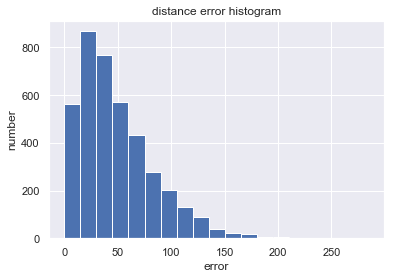

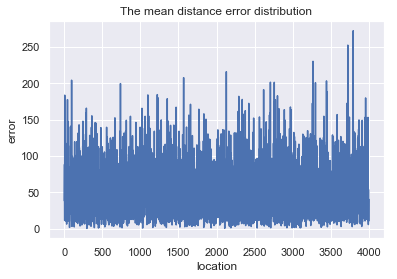

In [14]:
#calculate the mean of error distance
err = loc_prediction - location_test
x = err[:,:1]
y = err[:,1:]

err_abs = np.abs(err)
# err_abs_mean = np.mean(err_abs)
# print(err_abs_mean)
#print(err_abs_mean.shape)
err_dis = np.sqrt(np.square(x)+np.square(y))
err_min = np.min(err_dis)
err_max = np.max(err_dis)
err_avg = np.mean(err_dis)
print("error distance is ", err_avg)
print("max error distance is ", err_max)
print("min error distance is ", err_min)
#set the value of x, y, z
x,y,z = location_test[:,:1],location_test[:,1:2],err_dis

#plot the 2D image of error
plt.figure(1)
#plt.subplot(2,1,2)
plt.hist(err_dis, bins =  range(0,300,15)) 
plt.xlabel("error")
plt.ylabel("number")
plt.title("distance error histogram") 

plt.figure(2)
#plt.subplot(2,1,1)
plt.plot(err_dis)
plt.title("The mean distance error distribution")
plt.xlabel("location")
plt.ylabel("error")
plt.show()


Text(0.5, 0.92, 'The mean distance error of 3D Iamge')

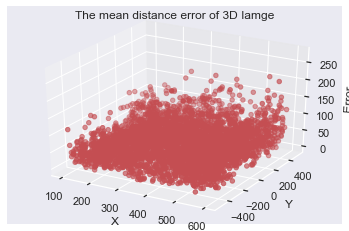

In [15]:
#plot 3D image
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Error")
plt.title("The mean distance error of 3D Iamge")

Text(0.5, 1.0, "The mean distance error of 'heat map'")

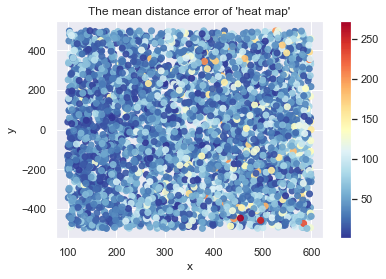

In [16]:
#draw the "heatmap" of error
fig = plt.figure()
ax3 = fig.add_subplot(111)
cm = plt.cm.get_cmap('RdYlBu_r') #Accent  RdYlBu_r RdYlBu  Blues_r  Greens  YlOrBr_r

sc = ax3.scatter(x,y,c = z, marker = 'o', label = 'test',alpha=0.9, cmap=cm)
plt.colorbar(sc)
ax3.set_xlabel("x")
ax3.set_ylabel("y")
plt.title("The mean distance error of 'heat map'")